In [1]:
from datetime import datetime

from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
import minigrid
import gymnasium as gym


from example_load_minigrid_data import transform_obs_to_image
from odgn.env_interaction import collect_data
from odgn.gym_dataset import GymDataset

Datasets can be generated using the `collect_data` function
There environment of different sizes available. A list can be obtained with:

In [2]:
import gymnasium as gym
[env for env in gym.envs.registry.keys() if 'Memory' in env]

['MiniGrid-MemoryS17Random-v0',
 'MiniGrid-MemoryS13Random-v0',
 'MiniGrid-MemoryS13-v0',
 'MiniGrid-MemoryS11-v0',
 'MiniGrid-MemoryS9-v0',
 'MiniGrid-MemoryS7-v0']

100%|██████████| 10/10 [00:00<00:00, 15.44it/s]



GymDataset(gymnasium_env_id='MiniGrid-MemoryS13-v0', collection_date=datetime.datetime(2025, 12, 9, 13, 19, 40, 520157), trajectories=[Trajectory (845), Trajectory (151), Trajectory (74), Trajectory (845), Trajectory (845), Trajectory (43), Trajectory (34), Trajectory (845), Trajectory (682), Trajectory (508)])

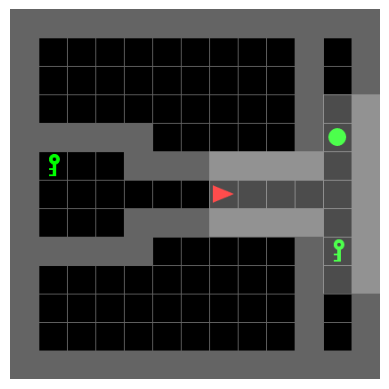

In [3]:
steps = None
episodes = 10
env_id = "MiniGrid-MemoryS13-v0"

env = gym.make(env_id, render_mode='rgb_array')
policy = lambda obs: (env.action_space.sample(), 0.0)
trajectories = collect_data(env, policy, n_episodes=10)
dataset = GymDataset(env_id, datetime.now() ,trajectories)

plt.imshow(env.render())
plt.axis('off')

dataset

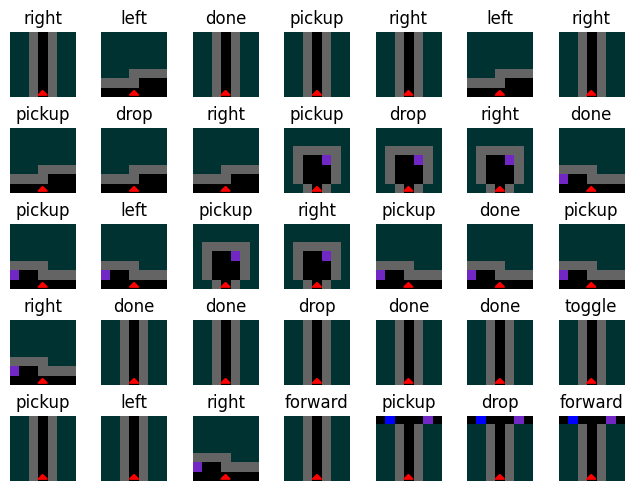

In [4]:
traj = 0
fig, axs = plt.subplots(5, 7, layout='constrained')
for i, ax in enumerate(axs.flat):

    img = transform_obs_to_image(dataset[traj].o[i])
    ax.imshow(img)
    ax.axis('off')
    action = minigrid.core.actions.Actions(dataset[traj].a[i])
    # facing = '↓←↑→'[dataset[traj].o[i]['direction']]

    triangle = [ (2.5, 6.3), (3.5, 6.3), (3, 5.8)]
    poly = Polygon(triangle, closed=True, color='red')
    ax.add_patch(poly)
    ax.set_title(f'{action.name}')

The agent sees 7x7 viewport. Because the viewport is not centered on the agent, there is little overlap after turning left or right.

Goal is to predict `(internal EGRU state, observation, action) => (next observation)`